In [13]:
# Import Data
import numpy as np
import pandas as pd
df_dc= pd.read_csv("C:/Users/chunweil/Cleaned_DCWater.csv")
df_dc.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'GLOBALID', u'Year', u'BinomBreak',
       u'TMIN', u'SnowFall', u'Prcp', u'FrzIndex', u'DIAMTR', u'AGE15',
       u'FrostAct', u'CorCon', u'CorSteel', u'ClayPrct', u'HouseTot', u'Pop',
       u'Road', u'MATRL_CI', u'MATRL_Concrete', u'MATRL_DI', u'MATRL_Oth',
       u'MATRL_PVC', u'MATRL_Steel', u'MATRL_Unk', u'LANDUSE_0',
       u'LANDUSE_Commercial/Institutio0l', u'LANDUSE_Public',
       u'LANDUSE_Residential', u'LANDUSE_Transport', u'LANDUSE_Water',
       u'SoilType_0', u'SoilType_coarse-loamy', u'SoilType_fine',
       u'SoilType_fine-loamy', u'SoilType_fine-silty',
       u'SoilType_loamy-skeletal', u'SoilType_sandy',
       u'SoilType_sandy-skeletal', u'SoilType_unused', u'BusTraffic_0',
       u'BusTraffic_BusRestrict', u'BusTraffic_BusTruckRestrict',
       u'BusTraffic_PrimaryRoad', u'BusTraffic_TruckRestrict'],
      dtype='object')

In [2]:
# set target and predictor datset
z=xrange(5,45)
X=df_dc.iloc[:,z]
Y=df_dc.iloc[:,4]


In [20]:
# Feature Selection approach 1 : PCA 
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [21]:
a=range(4,45)
dc_pca=df_dc.iloc[:,a]
dc_pca.columns

Index([u'BinomBreak', u'TMIN', u'SnowFall', u'Prcp', u'FrzIndex', u'DIAMTR',
       u'AGE15', u'FrostAct', u'CorCon', u'CorSteel', u'ClayPrct', u'HouseTot',
       u'Pop', u'Road', u'MATRL_CI', u'MATRL_Concrete', u'MATRL_DI',
       u'MATRL_Oth', u'MATRL_PVC', u'MATRL_Steel', u'MATRL_Unk', u'LANDUSE_0',
       u'LANDUSE_Commercial/Institutio0l', u'LANDUSE_Public',
       u'LANDUSE_Residential', u'LANDUSE_Transport', u'LANDUSE_Water',
       u'SoilType_0', u'SoilType_coarse-loamy', u'SoilType_fine',
       u'SoilType_fine-loamy', u'SoilType_fine-silty',
       u'SoilType_loamy-skeletal', u'SoilType_sandy',
       u'SoilType_sandy-skeletal', u'SoilType_unused', u'BusTraffic_0',
       u'BusTraffic_BusRestrict', u'BusTraffic_BusTruckRestrict',
       u'BusTraffic_PrimaryRoad', u'BusTraffic_TruckRestrict'],
      dtype='object')

In [22]:
# covert it into numpy arrays
X_ar=dc_pca.values
# Scaling the values
X_ar=scale(X_ar)
pca=PCA(n_components=41)
pca.fit(X_ar)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1

[ 11.67  18.82  24.08  28.51  32.59  36.49  39.93  43.32  46.51  49.42
  52.31  55.03  57.62  60.19  62.74  65.25  67.72  70.18  72.63  75.07
  77.49  79.87  82.23  84.53  86.78  89.    91.01  92.86  94.63  96.08
  97.41  98.15  98.8   99.37  99.78  99.89  99.99  99.99  99.99  99.99
  99.99]


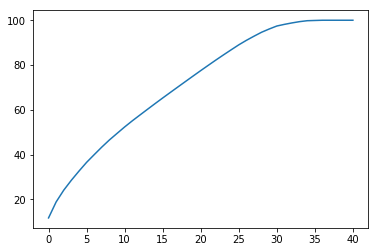

In [23]:
plt.plot(var1)

In [37]:
# Based on the figure, we select 30 as model component since the variance doesn't change too much after number 30
pca = PCA(n_components=30)
pca.fit(X)
X1=pca.fit_transform(X)
X123=pd.DataFrame(X1)
X123.shape

(298536, 30)

In [27]:
X123.head(6)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,261.990410,-63.240493,10.622868,3.034288,-13.065914,-5.195494,0.822599,-1.511335,-1.007255,0.009023,...,-0.307675,-0.157444,0.296712,0.002070,-0.184608,-0.051019,0.209841,-0.155016,0.233700,-0.077094
1,-224.240382,14.028137,-2.898917,3.034288,-13.065914,-8.305494,-13.186130,-1.511335,-1.007255,1.010350,...,-0.046601,0.167690,0.968716,0.053189,-0.571823,-0.168508,0.616247,0.804676,-0.153196,-0.172269
2,-224.240382,14.028137,-2.898917,3.034288,-13.065914,-8.305494,-13.186130,-1.511335,-1.007255,1.010350,...,-0.046601,0.167690,0.968716,0.053189,-0.571823,-0.168508,0.616247,0.804676,-0.153196,-0.172269
3,-231.173322,12.968713,-33.897895,3.034288,-13.065914,-8.064996,-11.345484,-1.511335,-1.007255,1.611227,...,0.024773,-0.383559,1.057178,0.058538,-0.323757,-0.477791,0.096257,-0.084530,-0.143800,0.020723
4,-231.174837,12.966840,-33.882344,3.034288,-13.065914,-8.085573,-10.380671,-1.511335,-1.007255,1.324872,...,-0.608169,0.035978,1.037069,0.120196,-0.390847,-0.298574,0.093164,-0.075412,-0.163293,0.032437
5,18.563762,-16.556644,-0.563680,3.034288,-13.065914,-0.736007,-10.550885,-1.511335,-1.007255,1.727420,...,-0.658474,0.032837,1.000066,0.121114,-0.463156,-0.314992,0.121807,-0.104029,-0.153226,0.028127


In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
rfe1=RFE(LR,20)
rfe1.fit(X,Y)

names=X.columns
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe1.ranking_), names))

Features sorted by their rank:
[(1.0, 'BusTraffic_0'), (1.0, 'BusTraffic_BusRestrict'), (1.0, 'BusTraffic_BusTruckRestrict'), (1.0, 'BusTraffic_PrimaryRoad'), (1.0, 'BusTraffic_TruckRestrict'), (1.0, 'LANDUSE_0'), (1.0, 'LANDUSE_Commercial/Institutio0l'), (1.0, 'LANDUSE_Public'), (1.0, 'LANDUSE_Residential'), (1.0, 'LANDUSE_Transport'), (1.0, 'MATRL_Concrete'), (1.0, 'MATRL_DI'), (1.0, 'MATRL_Oth'), (1.0, 'MATRL_PVC'), (1.0, 'Road'), (1.0, 'SoilType_0'), (1.0, 'SoilType_fine'), (1.0, 'SoilType_sandy'), (1.0, 'SoilType_sandy-skeletal'), (1.0, 'SoilType_unused'), (2.0, 'LANDUSE_Water'), (3.0, 'CorCon'), (4.0, 'FrostAct'), (5.0, 'MATRL_Unk'), (6.0, 'CorSteel'), (7.0, 'SoilType_loamy-skeletal'), (8.0, 'SoilType_fine-loamy'), (9.0, 'SoilType_coarse-loamy'), (10.0, 'ClayPrct'), (11.0, 'MATRL_Steel'), (12.0, 'TMIN'), (13.0, 'DIAMTR'), (14.0, 'FrzIndex'), (15.0, 'MATRL_CI'), (16.0, 'Prcp'), (17.0, 'SnowFall'), (18.0, 'AGE15'), (19.0, 'SoilType_fine-silty'), (20.0, 'Pop'), (21.0, 'HouseTot')]


In [33]:
import numpy as np
select_RFE1=sorted(zip(map(lambda x: round(x, 4), rfe1.ranking_), names))
RFE1_select=pd.DataFrame(select_RFE1)
RFE1_select.head()

,0,1
0,1.0,BusTraffic_0
1,1.0,BusTraffic_BusRestrict
2,1.0,BusTraffic_BusTruckRestrict
3,1.0,BusTraffic_PrimaryRoad
4,1.0,BusTraffic_TruckRestrict


In [ ]:
# Feature Selection approach 2: Recursive feature elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
 
 
#use linear regression as the model
lr = LogisticRegression()
names=X.columns
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))


In [91]:
import numpy as np
select_RFE=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
RFE_select=pd.DataFrame(select_RFE)
RFE_select.head()


,0,1
0,1.0,BusTraffic_BusTruckRestrict
1,2.0,BusTraffic_TruckRestrict
2,3.0,BusTraffic_0
3,4.0,BusTraffic_PrimaryRoad
4,5.0,BusTraffic_BusRestrict


In [100]:
old_names=[0,1]
new_names=["A","B"]
RFE_select.rename(columns=dict(zip(old_names, new_names)), inplace=True)
RFE_select.head()
RFE_new=RFE_select.sort_values(by="A",ascending=False)
RFE_new.head(20)

,A,B
39,40.0,HouseTot
38,39.0,Pop
37,38.0,Prcp
36,37.0,AGE15
35,36.0,SnowFall
34,35.0,FrzIndex
33,34.0,TMIN
32,33.0,DIAMTR
31,32.0,ClayPrct
30,31.0,CorSteel


In [62]:
# Feature Selection approach 3: Random Forest
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
names=X.columns
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)


Features sorted by their score:
[(0.1382, 'Prcp'), (0.1214, 'Pop'), (0.1179, 'HouseTot'), (0.1085, 'AGE15'), (0.1067, 'SnowFall'), (0.1001, 'FrzIndex'), (0.0792, 'TMIN'), (0.052, 'DIAMTR'), (0.0194, 'ClayPrct'), (0.0175, 'BusTraffic_0'), (0.0171, 'BusTraffic_PrimaryRoad'), (0.0149, 'Road'), (0.0111, 'BusTraffic_TruckRestrict'), (0.0101, 'CorSteel'), (0.01, 'FrostAct'), (0.0098, 'SoilType_fine-loamy'), (0.0089, 'MATRL_Steel'), (0.0083, 'CorCon'), (0.0073, 'SoilType_fine'), (0.0069, 'MATRL_CI'), (0.0057, 'SoilType_fine-silty'), (0.0051, 'SoilType_0'), (0.0046, 'LANDUSE_Transport'), (0.0032, 'MATRL_Concrete'), (0.003, 'LANDUSE_Public'), (0.0027, 'LANDUSE_Commercial/Institutio0l'), (0.0021, 'BusTraffic_BusTruckRestrict'), (0.0018, 'SoilType_coarse-loamy'), (0.0017, 'MATRL_DI'), (0.0011, 'SoilType_unused'), (0.0011, 'LANDUSE_Residential'), (0.001, 'SoilType_loamy-skeletal'), (0.0005, 'SoilType_sandy-skeletal'), (0.0004, 'SoilType_sandy'), (0.0004, 'MATRL_Unk'), (0.0002, 'BusTraffic_BusRestr

In [106]:
import numpy as np
select_RF=sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
RF_select=pd.DataFrame(select_RF)
RF_select.head(20)


,0,1
0,0.1382,Prcp
1,0.1214,Pop
2,0.1179,HouseTot
3,0.1085,AGE15
4,0.1067,SnowFall
5,0.1001,FrzIndex
6,0.0792,TMIN
7,0.0520,DIAMTR
8,0.0194,ClayPrct
9,0.0175,BusTraffic_0


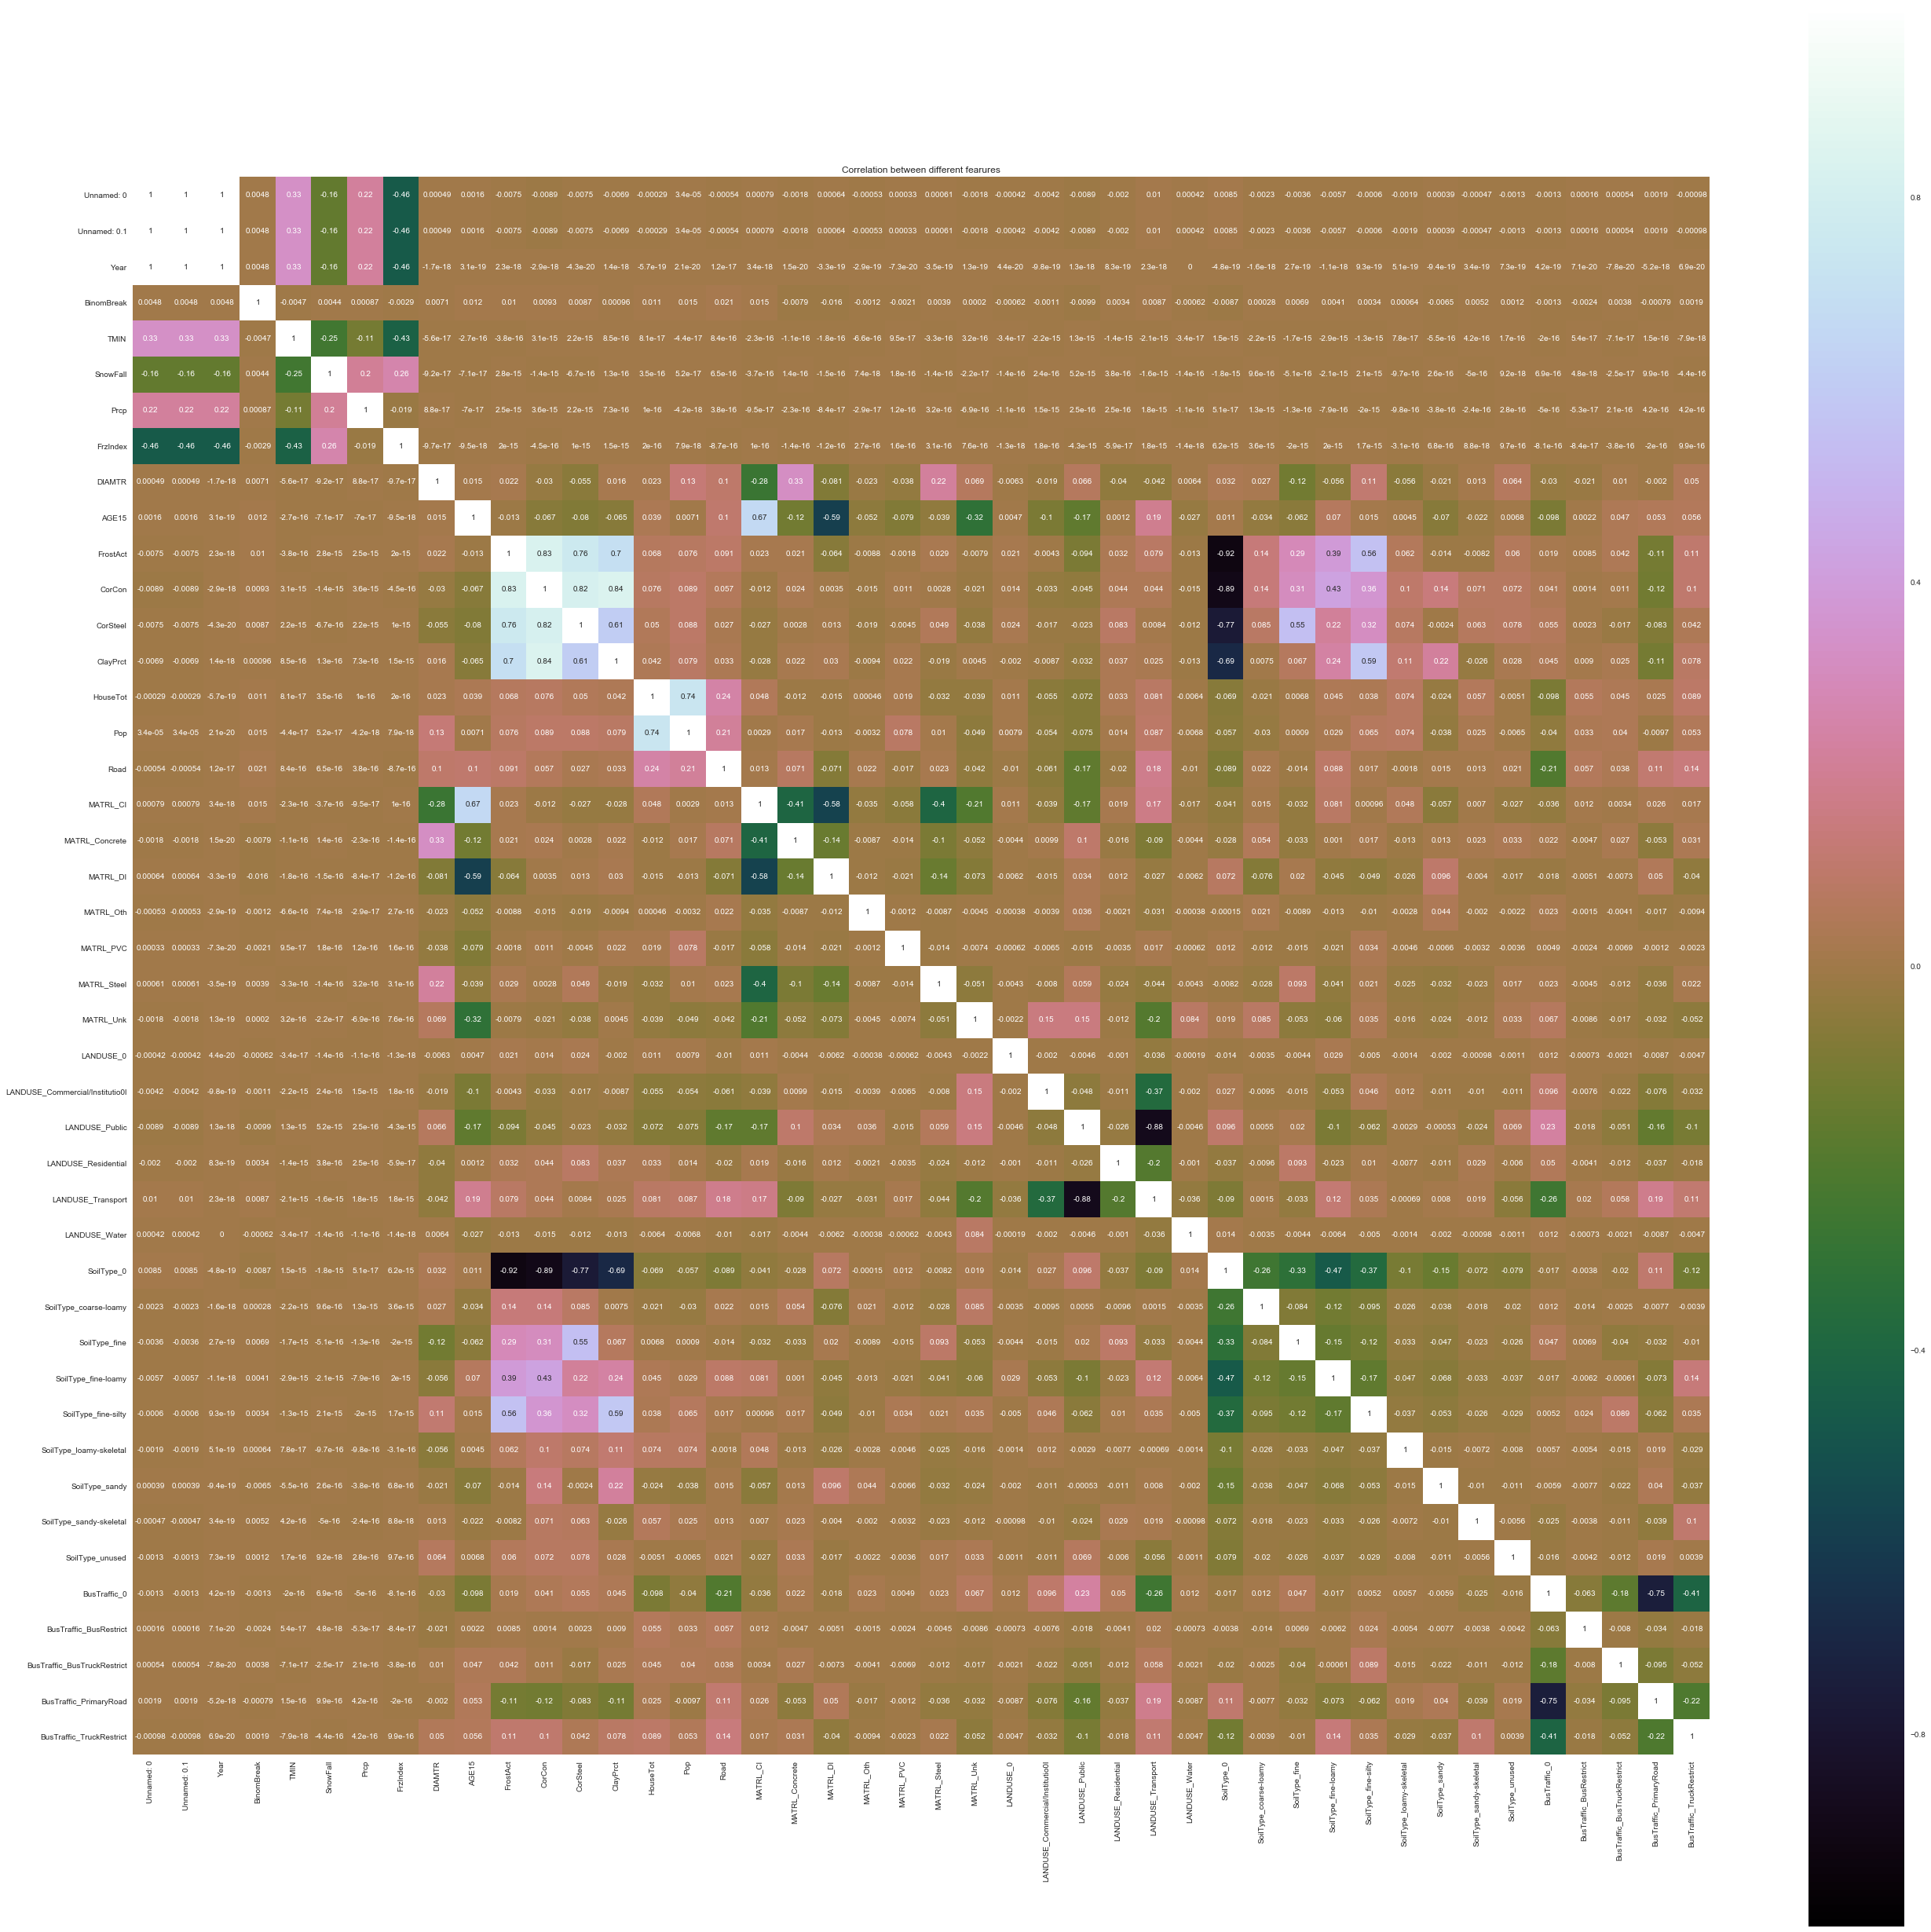

In [107]:
# Feature Selection approach 4: Correlation Matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_dc.drop(['Unnamed: 0', 'Unnamed: 0.1', 'GLOBALID', 'Year'],1)
df_dc.corr()
correlation=df_dc.corr()
plo= plt.figure(figsize=(45,45))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plo.savefig('Correlation Matrix')

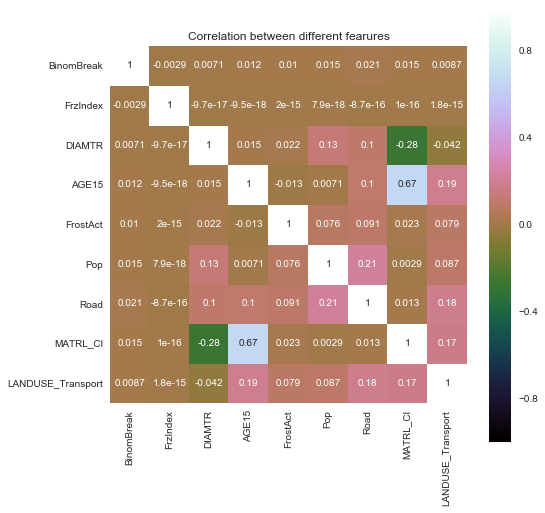

In [108]:
# Based from the result, we should drop variables that are highly correlaed with features that's already present
Important_feature=['BinomBreak','FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
df3=df_dc.reindex(columns=Important_feature)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df3.corr()
correlation2=df3.corr()
plo2= plt.figure(figsize=(8,8))
sns.heatmap(correlation2, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plo2.savefig('Correlation Matrix')

In [109]:
# check correlation between target and predictors 
correlation_break = pd.DataFrame(correlation2["BinomBreak"])
correlation_break.sort_values(by = 'BinomBreak', ascending = False)

,BinomBreak
BinomBreak,1.000000
Road,0.021320
Pop,0.014897
MATRL_CI,0.014677
AGE15,0.011552
FrostAct,0.010362
LANDUSE_Transport,0.008747
DIAMTR,0.007066
FrzIndex,-0.002889
